1. 在给定的文件夹中，获取不同格式的图像文件列表；

2. 顺次读取文件列表中每个文件名对应的图像文件，获取该图像的行数、列数、颜色通道数，显示该图像，并转存成其它格式的图像文件。

## skimage.io

In [ ]:
from skimage import io,data
import os

#获取图像文件文件列表
image_list=[]

for root, dirs, files in os.walk('img'):
    for i in files:
        image_list.append(i)

#图像文件名列表
image_list_new = [i.split('.')[0] for i in image_list]        
#创建新文件夹
# os.mkdir("images")

#遍历图像文件，获取该图像的行数、列数、颜色通道数，显示该图像
for i in range(len(image_list)):
    img = io.imread("img\\"+image_list[i])
    # img_r = cv.imdecode(np.fromfile(img_r, dtype=np.uint8), 1) #当路径中有中文时使用，如果无中文可使用imread
    print(image_list_new[i])
    print("column:" + str(img.shape[0]) + "  line:" + str(img.shape[1]) + "  port:" + str(img.shape[2]))
    io.imshow(img)
    io.show()
    #将所有图像转为png形式保存
    io.imsave('images\\' + image_list_new[i] + ".png", img)

In [ ]:
def change_image(file_path, save_path):
    from skimage import io
    import os
    # 1. 读取文件列表
    file_list = os.listdir(file_path)
    print("将要转换的文件列表：\n{}".format(file_list))
    for index, file_name in enumerate(file_list):
        img = io.imread(os.path.join(file_path, file_name))
        messages = img.shape
        row_num = messages[0]
        col_num = messages[1]
        n = messages[2]
        print(file_path + "\\" + file_name + "[行数：{0}，列数：{1}，通道数：{2}]".format(row_num, col_num, n))
        
        io.imshow(img)
        io.show()
        
        # 保存为其他格式
        index_of_point = file_name.rfind(".")
        new_file = save_path + "\\" + file_name[0:index_of_point] + ".bmp"
        print(new_file)
        io.imsave(new_file, img)
    
    

In [ ]:
change_image("img", "images")

In [ ]:
import numpy as np
import cv2 as cv
import os
from skimage import io
imgs = os.listdir('./images')
print('文件列表为：')
print(imgs)
for img in imgs:
    img_r = './images/'+img
    print('当前图片为：'+img)
    with open (img_r, 'r+') as img_file:
        #获取图像的基本信息,行数，列数，通道数（如果为灰度图像获得的是行列，彩色图像获得的是行数、列数、通道数）
        print(io.imread(img_r).shape) 
        img_r = cv.imdecode(np.fromfile(img_r, dtype=np.uint8), 1) #当路径中有中文时使用，如果无中文可使用imread
        cv.namedWindow('image', cv.WINDOW_NORMAL) #打开一个弹窗
        cv.imshow('image', img_r)
        k = cv.waitKey(0)
        if  cv.getWindowProperty('image', 1) < 0: #使弹窗可以在按下右上角的x时可以关闭
            cv.destroyAllWindows()
            break
        if k == 27:         #使弹窗可以在按下esc时随时停止
            cv.destroyAllWindows()
            break    
    img_t = img.split('.')
    if img_t[1] != 'img':
        #重命名
        img_t[1]='img'
        img_s = '.'.join(img_t)
    else:
        img_t[1] = 'jpg'
        img_s = '.'.join(img_t)    
    os.rename(r'./images/'+img,r'./images/'+img_s)
cv.destroyAllWindows() #图片都展示完自动关闭

## cv2  PIL.Image

cv2模块的imread函数呆以正常读取'jpg','png'，'bmp'格式的图片，但是不能处理'gif'图片

Image.open(path+file).show() 显示的都是png。

In [ ]:
from PIL import Image
import cv2 as cv
import os


filelist = os.listdir('./img/')
included_extensions = ['jpg', 'bmp', 'png']
 
file_names = [fn for fn in filelist
              if any(fn.endswith(ext) for ext in included_extensions)]
print("图像文件列表:")
print(file_names)

for file in file_names:
    img = cv.imread('./img/' + file)
    if img is not None:
        outfile = os.path.splitext(file)[0] + ".png"
        print(file)
        print("行数:",img.shape[0])
        print("列数:",img.shape[1])
        print("颜色通道数:",img.shape[2])
        Image.open('./img/' + file).show()
#         Image.open(file).save('./images/'+'News_'+outfile)

In [ ]:
import os
from PIL import Image
import cv2 as cv

path = 'img'

#1.在给定的文件夹中，获取不同格式的图像文件列表；
dir_list = os.listdir(path)
print('1.不同格式的图像文件列表')
print(dir_list)

#2.顺次读取文件列表中每个文件名对应的图像文件，获取该图像的行数、列数、颜色通道数，
#显示该图像，并转存成其它格式的图像文件。

print('\n2. 顺次读取文件列表中每个文件名对应的图像文件，获取该图像的行数、列数、颜色通道数')
for f in dir_list:
    img =cv.imread(path+'/'+f)
    if img is not None:
        img_info = img.shape
        print('%s图片信息' % f)
        print('图像行数：%d  图像列数：%d  图像颜色通道数：%d\n' % (img_info[0],img_info[1],img_info[2]))

        #显示图像
        Image.open(path+'/'+f).show()

        #将图片存成其它格式的图像文件（保存在与脚本文件同一级的目录下）
        new_file_name = f.split('.')[0]+'.png'
        cv.imwrite(new_file_name, img)

## cv2  matplotlib

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage import io

img = {}
#获取文件列表
def get_file_name(filename):
    dirs = os.listdir(filename)
    return dirs
#获取图片信息，并生成图片
def get_file_image(list):
    
    for i in range(len(a)):
        img[i] = io.imread("img/"+a[i])
        print(img[i].shape)
        io.imshow(img[i])
        plt.show()
#为图片更改格式，并保存到文件夹
def change_img(list):
    for i in range(len(a)):
        io.imsave("images/"+str(i)+".bmp",img[i])
        
a=get_file_name(r"./img")   
print(a)
get_file_image(a)
change_img(a)

## PIL.Image matplotlist.pyplot

文件 javaee.jpg 的行数是： 258  列数是： 200
通道数是： 3


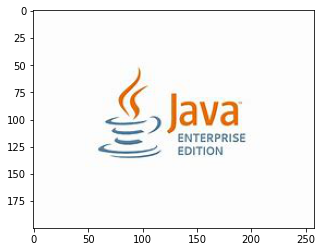

文件 jiayou.png 的行数是： 289  列数是： 216
通道数是： 4


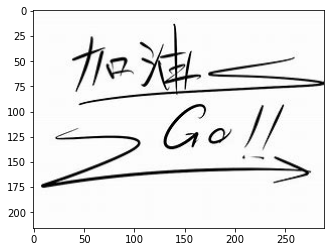

In [2]:
import os
from  PIL import Image as IM
import matplotlib.pyplot as plt
import numpy as np
import re
c=os.listdir('./img/')
a=[]
d=[]
b=[]
for i in c:
    a=re.findall('.jpg',i)
    if a!=[]:
        d.append(i)
    b=re.findall('.png',i)
    if b!=[]:
        d.append(i)
        
for i in d:
    a=[]
    Im=IM.open('./img/' + i)
    print("文件",i,"的行数是：",Im.size[0]," 列数是：",Im.size[1])
    print("通道数是：",len(Im.split()))
    plt.imshow(Im)
    plt.show()
    Im.convert('1').save('./images/' + i+'.bmp',quality=100)

1、图像类型列表
png图片列表：
jiayou-Copy1.png
jpg图片列表：
javaee-Copy1.jpg
gif图片列表：
baidu-Copy1.gif

2、读取图像文件的详细信息
输出类型：<class 'numpy.ndarray'>
图片的尺寸:(216, 289, 4)


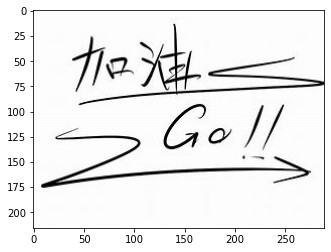

输出类型：<class 'numpy.ndarray'>
图片的尺寸:(200, 258, 3)


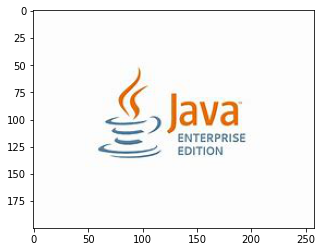

输出类型：<class 'numpy.ndarray'>
图片的尺寸:(240, 240, 4)


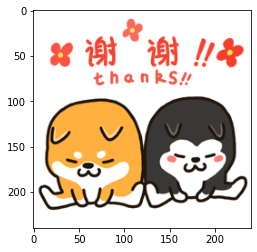

In [4]:
def find_files_in_dir(dir, pattern):
    import fnmatch
    import os
    return (file for file in os.listdir(dir)
            if fnmatch.fnmatch(file, pattern))
# 2. 顺次读取文件列表中每个文件名对应的图像文件，
# 获取该图像的行数、列数、颜色通道数，显示该图像，并转存成其它格式的图像文件
def print_img_list():
    # 遍历图像类型
    idx = 0
    for name in file_name:
        print(name + '图片列表：')
        # 查找文件夹下对应的图像
        for file in find_files_in_dir('.', '*.' + name):
            # 打印
            print(file)
            folder.append(file)
    print()

def show_detail():
    import matplotlib.pyplot as plt
    for file in folder:
        image_matplot = plt.imread(file)
        plt.imshow(image_matplot)
        print('输出类型：{}'.format(type(image_matplot)))
        print('图片的尺寸:{}'.format(image_matplot.shape))
        plt.show()

# 图像类型
file_name = ['png', 'jpg', 'gif']
# 保存文件的名称
folder = []

print('1、图像类型列表')
print_img_list()

print('2、读取图像文件的详细信息')
show_detail()

['baidu.gif', 'javaee.jpg', 'jiayou.png']

该图像的行数:240
该图像的列数:240
颜色通道数:4


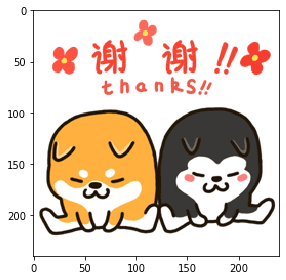


该图像的行数:200
该图像的列数:258
颜色通道数:3


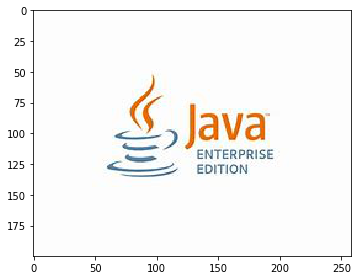


该图像的行数:216
该图像的列数:289
颜色通道数:4


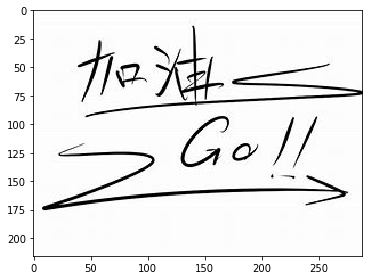

In [6]:
# 1.获取列表
from skimage import io
import os
#1.在给定的文件夹中，获取不同格式的图像文件列表；
def get_img_list(path):
    is_image_file = lambda x : any(x.endswith(extension)
                                   for extension in ['.jpg', 'png', 'gif'])
    return [x for x in os.listdir(path) if is_image_file(x)]

imgs = get_img_list("img")
print(imgs)

#2.顺次读取文件列表中每个文件名对应的图像文件，获取该图像的行数、列数、颜色通道数，显示该图像，并转存成其它格式的图像文件。
for item in imgs:
    img = io.imread(f'img\\{item}')
    print(f'\n该图像的行数:{img.shape[0]}\n该图像的列数:{img.shape[1]}\n颜色通道数:{img.shape[2]}')
    io.imshow(img)
    io.show()
    io.imsave(f"images\\{item}.bmp",img)